In [20]:
import matplotlib.pyplot as plt
import openseespy.opensees as op
import pandas as pd

In [21]:
op.wipe()
#Definiendo el tipo de modelo
#Numero de dismensiones = 2 y numeros de grados de libertad
op.model('basic', '-ndm', 2, '-ndf', 3)

In [22]:
#Modelo Escalera
Huella = 0.275
Contrahuella = 0.175

Nudos = {
    'Nudo_1':[0.0, 0.0],
    'Nudo_2':[0.275, 0.0],
    'Nudo_3':[0.275, 0.175],
    'Nudo_4':[0.55, 0.175],
    'Nudo_5':[0.55, 0.35],
    'Nudo_6':[0.825, 0.35],
    'Nudo_7':[0.825, 0.525],
    'Nudo_8':[1.1, 0.525],
    'Nudo_9':[1.1, 0.7],
    'Nudo_10':[1.375, 0.7],
    'Nudo_11':[1.375, 0.875],
    'Nudo_12':[1.65, 0.875],
    'Nudo_13':[1.65, 1.05],
    'Nudo_14':[1.925, 1.05],
    'Nudo_15':[1.925, 1.225],
    'Nudo_16':[2.2, 1.225],
    'Nudo_17':[2.2, 1.4],
    'Nudo_18':[2.475, 1.4],
    'Nudo_19':[2.475, 1.575],
    'Nudo_20':[2.75, 1.575],
    'Nudo_21':[2.75, 1.75],
    'Nudo_22':[3.025, 1.75],
    'Nudo_23':[3.025, 1.925],
    'Nudo_24':[3.3, 1.925],
}

#Valores de C
CoordenadasX = []
CoordenadasY = []

for i in Nudos.values():
    CoordenadasX.append(i[0])
    CoordenadasY.append(i[1])
    
#print('CoordenadasX: {}'.format(CoordenadasX))
#print('CoordenadasY: {}'.format(CoordenadasY))

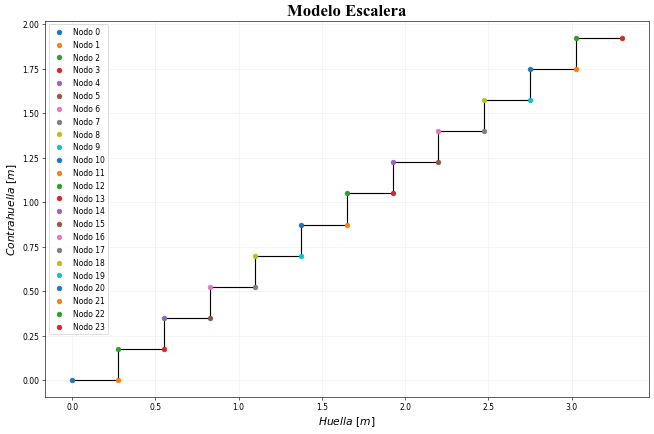

In [57]:
plt.figure(figsize=(12, 8), dpi = 55)
plt.plot(CoordenadasX, CoordenadasY,'-',color='k')

for i in range(len(CoordenadasX)):
    plt.plot(CoordenadasX[i], CoordenadasY[i],'o', label = 'Nodo %i' % (i))

plt.grid(which="major", alpha=0.2)
plt.grid(which="minor", alpha=0.2)

plt.title('Modelo Escalera', fontsize=22, fontname="Times New Roman", fontweight='bold')
plt.xlabel("$Huella$ $[m]$", fontsize=14)
plt.ylabel("$Contrahuella$ $[m]$", fontsize=14)

plt.legend()
plt.tight_layout()
plt.show()



In [6]:
#Declaracion de nudos del problema
for i in range(len(Nudos)):
    op.node(i, CoordenadasX[i], CoordenadasY[i])


In [7]:
#Definir la transformacion de coordenadas
op.geomTransf('Linear', 1)

In [8]:
#Definimos propiedad de barra
b = 1 #[m]
e = 0.125 #[m]
A = b*h #[m^2]
I = (b*e**3)/12 #[m^4]
E = 2153638.66 #[tonnef/m^2]  

for i in range(len(Nudos)-1):
    op.element('elasticBeamColumn',i,i,i+1,A,E,I,1)

In [9]:
#Restricciones de apoyos
Empotrado = [1,1,1]
Fijo = [1,1,0]
Movil = [0,1,0]

op.fix(0, *Empotrado)
op.fix(len(Nudos)-1, *Empotrado)

In [10]:
#Establecer una serie de tiempo
op.timeSeries('Linear', 101)

In [11]:
#Patron de cargas
op.pattern('Plain',201,101)

P = -0.42 #[tonnef] 1.2D + 1.6L

for i in range(11):
    op.load(i*2+2,0,P,0)

In [12]:
#grabando resultados en archivos
op.recorder('Node','-file','NodeDisp.txt','-time','-node',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,'-dof',1,2,3,'disp')
op.recorder('Node','-file','Reaction.txt','-time','-node',0,23,'-dof',1,2,3,'reaction')
op.recorder('Element','-file','Element.txt','-time','-ele',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,'-dof',1,2,3,'forces')

2

In [13]:
#Resolucion del modelo
op.constraints('Plain')
op.numberer('Plain')
op.system('FullGeneral')
op.test('NormDispIncr',1*10**-12,10)
op.algorithm('Newton')
op.integrator('LoadControl',1)
op.analysis('Static')
op.analyze(1)

op.wipe()

In [77]:
df = pd.read_table('NodeDisp.txt', skiprows=0, decimal=".",sep=" ", header=None)
desplaz = df.iloc[0]
desplaz.pop(0)
df = pd.read_table('Reaction.txt', skiprows=0, decimal=".",sep=" ", header=None)
reac = df.iloc[0]
reac.pop(0)
df = pd.read_table('Element.txt', skiprows=0, decimal=".",sep=" ", header=None)
forces = df.iloc[0]
forces.pop(0)

1.0

In [79]:
reac

1   -0.017917
2    2.298540
3    1.420810
4    0.017917
5    2.321460
6   -1.424140
Name: 0, dtype: float64

In [81]:
max(abs(desplaz)*1000)

1.9607